# Project 1

## Data preprocess

In [7]:
# get all data dir and write to unzip.sh
import os
import time
import datetime
from matplotlib import pyplot as plt
import sorting

In [8]:
path = "/Users/liyi/Desktop/Graduate/Spring2022/CSC505Algorithm/Project/project1/project1_data/Project1"

f = open("unzip.sh", "a")

listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(path):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]

for file in listOfFiles:
    f.write("gunzip " + file + "\n")

f.close()

## Data process

In [9]:
# utility func to get all data file
pathA = path+"/A"
pathB = path+"/B"
pathC = path+"/C"

logsA = list()
logsB = list()
logsC = list()
for (dirpath, dirnames, filenames) in os.walk(pathA):
    logsA += [os.path.join(dirpath, file) for file in filenames]

for (dirpath, dirnames, filenames) in os.walk(pathB):
    logsB += [os.path.join(dirpath, file) for file in filenames]

for (dirpath, dirnames, filenames) in os.walk(pathC):
    logsC += [os.path.join(dirpath, file) for file in filenames]

lenA = len(logsA)
lenB = len(logsB)
lenC = len(logsC)
# print(lenA + lenB + lenC)

In [10]:
string = "2015-08-23T03:36:25-05:00 10.108.69.93 sshd[16537]: Did not receive identification string from 208.43.117.11"
string = string[:19]
  
element = datetime.datetime.strptime(string,"%Y-%m-%dT%H:%M:%S")
  
timestamp = datetime.datetime.timestamp(element)
print(timestamp)

1440315385.0


### Utility: Get data

In [11]:
#utility func to get data from target log
#input: logFile index, logFile paths
#output: data array
def getData(idx, pathlist):
    length = len(pathlist)
    if(idx < 0 or idx >= length):
        print("index out of bound: ", idx)
        return None

    data = []

    path = pathlist[idx]
    with open(path, "r", encoding = 'iso8859_15') as currLog:
        for line in currLog:
            # get first 19 characters and convert to timestamp
            line = line[:19]
            line_element = datetime.datetime.strptime(string,"%Y-%m-%dT%H:%M:%S")
            timestamp = datetime.datetime.timestamp(line_element)

            # add time stamp to data
            data.append(timestamp)

    return data

### Utility: plot chart

In [12]:
def plot(xSet, ySet):
    # plt.plot(sizeSet, timeSet)   #, label='y = x'
    plt.scatter(xSet, ySet)
    plt.title('Adaptive sort on data set A')
    plt.xlabel('Input size')
    plt.ylabel('Time spent')
    plt.show()

## Insertion sort

### Utility: Insertion sort implementation

In [13]:
# def insertionSort(list):
#     for index in range(1, len(list)):
#         currVal = list[index]
#         pos = index

#         while pos > 0 and list[pos-1] > currVal:
#             list[pos] = list[pos - 1]
#             pos = pos - 1
#         list[pos] = currVal

In [14]:
# Python program for implementation of Insertion Sort
 
# Function to do insertion sort
def insertionSort(arr):
 
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
 
        key = arr[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

### Utility: test data set

In [15]:
def testInsertion(logs):
    sizeSet = []
    timeSet = []
    for logIdx in range(len(logs)):
        data = getData(logIdx, logs)
        sizeSet.append(len(data))
        currTime = time.time()

        insertionSort(data)
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        # print("curr log: %d, time spent: %d, total time: %d" %(logIdx, endTime - currTime, endTime - totalStart))

    return sizeSet, timeSet
    # print()
    

#### Data set A

In [16]:
# idx = 1
# data = getData(idx, logsA)
# print(len(data))
# print(logsA[idx])
# insertionSort(data)

In [17]:
# for idx in range(len(logsA)):
#     data = getData(idx, logsA)

#     currTime = time.time()
#     insertionSort(data)
#     endTime = time.time()
#     print(logsA[idx])
#     print("curr log: %d, time spent: %d" %(idx, endTime - currTime))

In [18]:
#sizeSetA, timeSetA = testInsertion(logsA)

In [19]:
#plot(sizeSetA, timeSetA)

#### Data set B

In [20]:
#sizeSetB, timeSetB = testInsertion(logsB)

In [21]:
#plot(sizeSetB, timeSetB)

#### Data set C

In [22]:
#sizeSetC, timeSetC = testInsertion(logsC)

In [23]:
#plot(sizeSetC, timeSetC)

## Merge sort

### Utility: test data set

In [24]:
def testMerge(logs):
    sizeSet = []
    timeSet = []
    for logIdx in range(len(logs)):
        data = getData(logIdx, logs)
        sizeSet.append(len(data))
        currTime = time.time()

        sorting.merge(data)
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        # print("curr log: %d, time spent: %d, total time: %d" %(logIdx, endTime - currTime, endTime - totalStart))

    return sizeSet, timeSet
    # print()
    

#### Data set A

In [25]:
sizeSetA, timeSetA = testMerge(logsA)

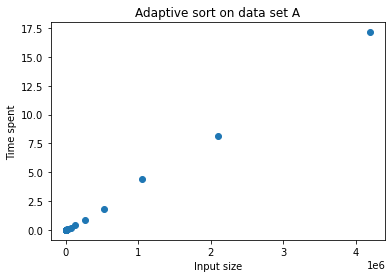

In [26]:
plot(sizeSetA, timeSetA)

#### Data set B

In [27]:
sizeSetB, timeSetB = testMerge(logsB)

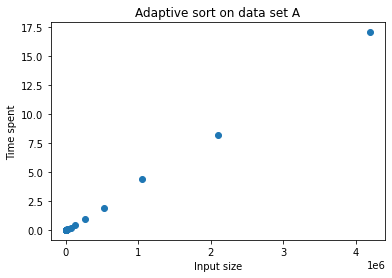

In [28]:
plot(sizeSetB, timeSetB)

#### Data set C

In [29]:
sizeSetC, timeSetC = testMerge(logsC)

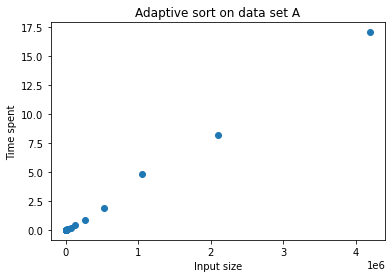

In [30]:
plot(sizeSetC, timeSetC)

## Adaptive sort
Using python built-in sort() algorithm which is Timsort

### Utility: test data set

In [31]:
def testTim(logs):
    sizeSet = []
    timeSet = []
    for logIdx in range(len(logs)):
        data = getData(logIdx, logs)
        sizeSet.append(len(data))
        currTime = time.time()

        data.sort()
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        # print("curr log: %d, time spent: %d, total time: %d" %(logIdx, endTime - currTime, endTime - totalStart))

    return sizeSet, timeSet
    # print()
    

#### Data set A

In [32]:
sizeSetA, timeSetA = testTim(logsA)

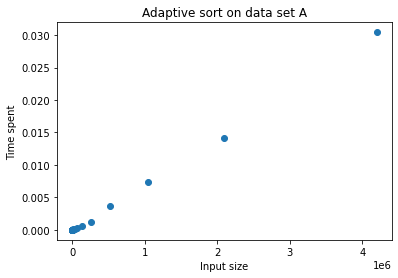

In [33]:
plot(sizeSetA, timeSetA)

#### Data set B

In [34]:
sizeSetB, timeSetB = testTim(logsB)

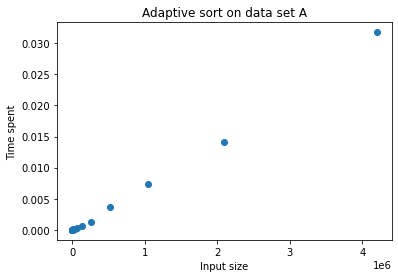

In [35]:
plot(sizeSetB, timeSetB)

#### Data set C

In [36]:
sizeSetC, timeSetC = testTim(logsC)

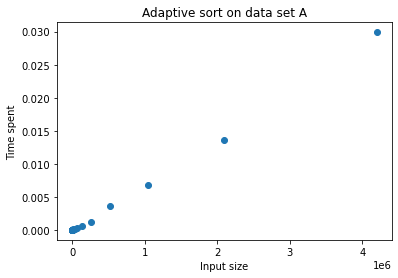

In [37]:
plot(sizeSetC, timeSetC)